In [83]:
%matplotlib inline
import os
import math
import numpy as np
import pandas as pd
import pyproj
from shapely import speedups
speedups.disable()
import fiona
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.path as mpath
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import matplotlib.font_manager as fm
from matplotlib.patches import FancyBboxPatch, Patch
import geopandas as gpd
from palettable.colorbrewer.sequential import Greys_7
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [84]:
gn = [2,181,155]
lgn = [71,182,1]
yl = [255,157,1]
rd = [255,56,84]
bu = [52,138,234]
lyl = [255,255,167]
wh = [255,255,255]
mbu= [88,178,240]
lbu= [123,217,246]
pu = [164,94,233]
rd2 = [255,50,23]
gn2 = [106,181,0]
b = rd2

In [85]:
def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])
def build_custom_continuous_cmap(*rgb_list):
    all_red = []
    all_green = []
    all_blue = []
    for rgb in rgb_list:
        all_red.append(rgb[0])
        all_green.append(rgb[1])
        all_blue.append(rgb[2])
    # build each section
    n_section = len(all_red) - 1
    red = tuple([(1/n_section*i,inter_from_256(v),inter_from_256(v)) for i,v in enumerate(all_red)])
    green = tuple([(1/n_section*i,inter_from_256(v),inter_from_256(v)) for i,v in enumerate(all_green)])
    blue = tuple([(1/n_section*i,inter_from_256(v),inter_from_256(v)) for i,v in enumerate(all_blue)])
    cdict = {'red':red,'green':green,'blue':blue}
    new_cmap = colors.LinearSegmentedColormap('new_cmap',segmentdata=cdict)
    return new_cmap
#new_cmap = build_custom_continuous_cmap([64,57,144],[112,198,162],[230,241,146],[253,219,127],[244,109,69],[169,23,69])
c = build_custom_continuous_cmap(bu,wh,rd2)
col = [b[0]/255, b[1]/255, b[2]/255]

In [86]:
map_df = gpd.read_file('ind4.shp')

In [87]:
df = pd.read_excel('States.xlsx', header=0)

In [88]:
df = df[['STATE', 'COUSIN', 'x','y','ABB', 'ABS']]
score = df.rename(index=str, 
                  columns={"COUSIN": 'value', "x": 'x', "y":'y', "ABB":'stnm'})
df

,STATE,COUSIN,x,y,ABB,ABS
0,Andaman and Nicobar Islands,5.4,92.0,9.5,Andaman and Nicobar,AN
1,Andhra Pradesh,22.1,78.3,14.6,Andhra Pradesh,AP
2,Arunachal Pradesh,1.8,94.0,29.5,Arunachal Pradesh,AR
3,Assam,1.2,92.2,25.9,Assam,AS
4,Bihar,3.6,85.0,25.3,Bihar,BR
...,...,...,...,...,...,...
40,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
merged = map_df.set_index('st_nm').join(score.set_index('STATE'))
merged.sort_values(by=["value"], inplace=True, ascending=False)
pd.set_option('display.max_rows', 40)

C:\Users\siddh\miniconda3\envs\myenv\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


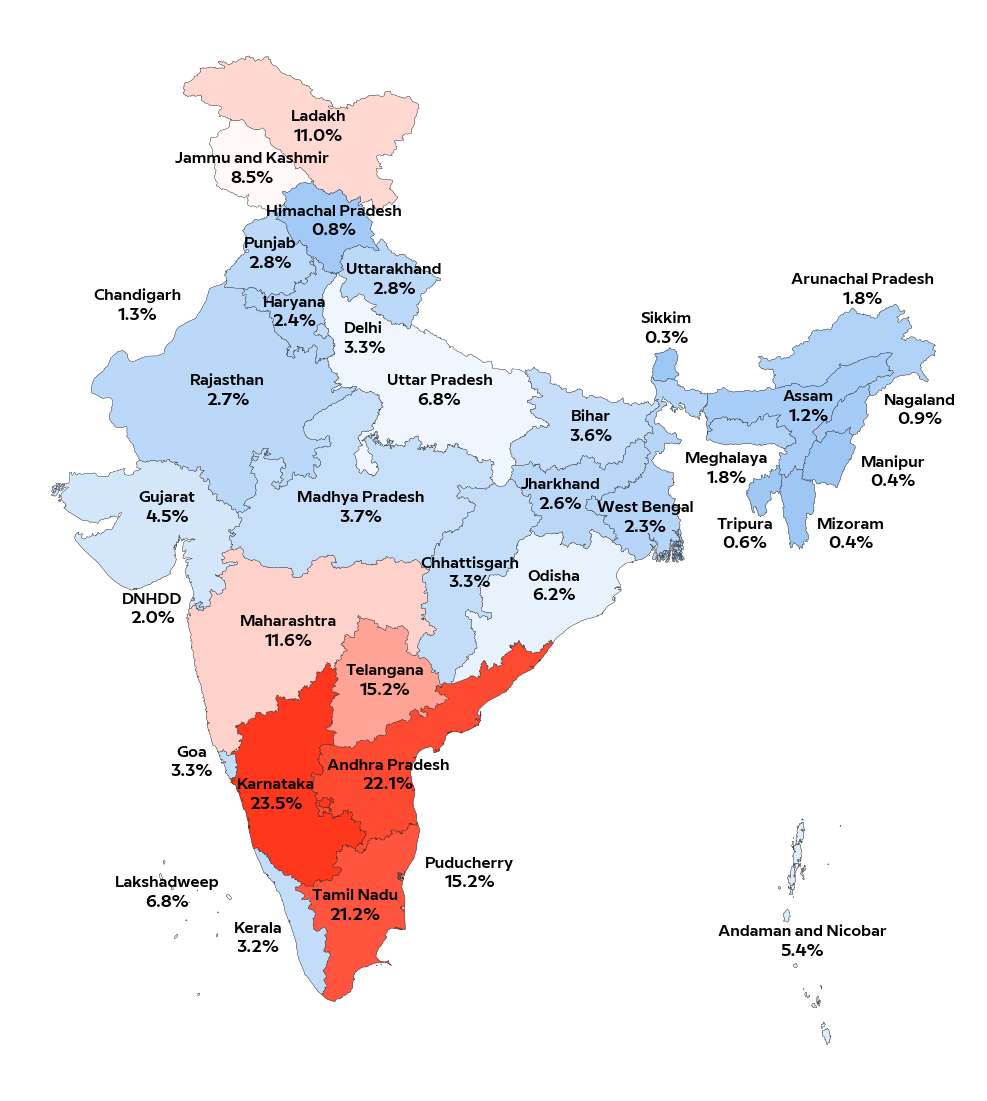

In [90]:
variable = 'value'
#vmin, vmax = merged["value"].min(), merged["value"].max()
#vmin, vmax = 0, 10.4
#vmin, vmax = 0, 1.0*merged["value"].max()
vmin, vmax = -8, 24
fig, ax = plt.subplots(1, figsize=(20, 20))
prop = fm.FontProperties(fname= 'proxima.otf')

merged.plot(ax = ax, column = variable, color = Greys_7.mpl_colors[1], label = 'No data', linewidth=0.3, edgecolor='0.1') 
merged.dropna().plot(ax = ax, column = variable, cmap = c, alpha = 1,
                    linewidth=0.3, edgecolor='0.1', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#merged.dropna().plot(ax = ax, column = variable, cmap = c.mpl_colormap, alpha = 1,
#                    linewidth=0.3, edgecolor='0.1', norm=colors.PowerNorm(gamma=0.4, vmin=vmin, vmax=vmax))

#plt.plot([72.6,76.84],[29.4,30.74],'black') #Chandigarh

for i in range(0,36):
    if math.isnan(merged["value"][i]) == True:
        a=1
        '''plt.text(merged["x"][i]+1,merged["y"][i], 'NA', fontsize = 18, ha = 'center',
                fontproperties = prop)
        plt.text(merged["x"][i]+1,merged["y"][i]+0.6, merged["stnm"][i], fontsize = 16, ha = 'center', 
                 fontproperties = prop)'''
    else:
        plt.text(merged["x"][i]+1,merged["y"][i], '' + str(float(round(merged["value"][i], 1))) + '%', fontsize = 18, ha = 'center',                 fontproperties = prop)
        #plt.text(merged["x"][i]+1,merged["y"][i], merged["ABS"][i], fontsize = 16, ha = 'center', 
        #         fontproperties = prop)
        plt.text(merged["x"][i]+1,merged["y"][i]+0.6, merged["stnm"][i], fontsize = 16, ha = 'center', 
                 fontproperties = prop)

'''w = ["Assam","Haryana"]
        
for i in range(0,36):
    for j in range(0,2):
        if merged["stnm"][i] == w[j]:
            plt.text(merged["x"][i]+1,merged["y"][i], '' + str(float(round(merged["value"][i], 2))) + '%', fontsize = 18, ha = 'center',
                     fontproperties = prop, color='w', path_effects=[pe.withStroke(linewidth=2, foreground="black")])
            plt.text(merged["x"][i]+1,merged["y"][i]+0.6, merged["stnm"][i], fontsize = 16, ha = 'center', 
                     fontproperties = prop, color='w', path_effects=[pe.withStroke(linewidth=2, foreground="black")])
        else:
            a=1
    else:
        a=1'''
#, path_effects=[pe.withStroke(linewidth=2, foreground="black")]
        
ax.axis('off')
fig.savefig('India.png', dpi=300)

In [91]:
'''fig3, ax = plt.subplots(1, figsize=(20, 20))
sm = plt.cm.ScalarMappable(cmap=c.mpl_colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm = plt.cm.ScalarMappable(cmap=c.mpl_colormap, norm=colors.PowerNorm(gamma=0.4, vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig3.colorbar(sm, extend='max')
cbar.ax.tick_params(labelsize=45)
#cbar.ax.set_yticklabels(fontsize=45, fontproperties=prop)
fig3.savefig('India2.png', dpi=300)'''

"fig3, ax = plt.subplots(1, figsize=(20, 20))\nsm = plt.cm.ScalarMappable(cmap=c.mpl_colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))\n#sm = plt.cm.ScalarMappable(cmap=c.mpl_colormap, norm=colors.PowerNorm(gamma=0.4, vmin=vmin, vmax=vmax))\nsm.set_array([])\ncbar = fig3.colorbar(sm, extend='max')\ncbar.ax.tick_params(labelsize=45)\n#cbar.ax.set_yticklabels(fontsize=45, fontproperties=prop)\nfig3.savefig('India2.png', dpi=300)"

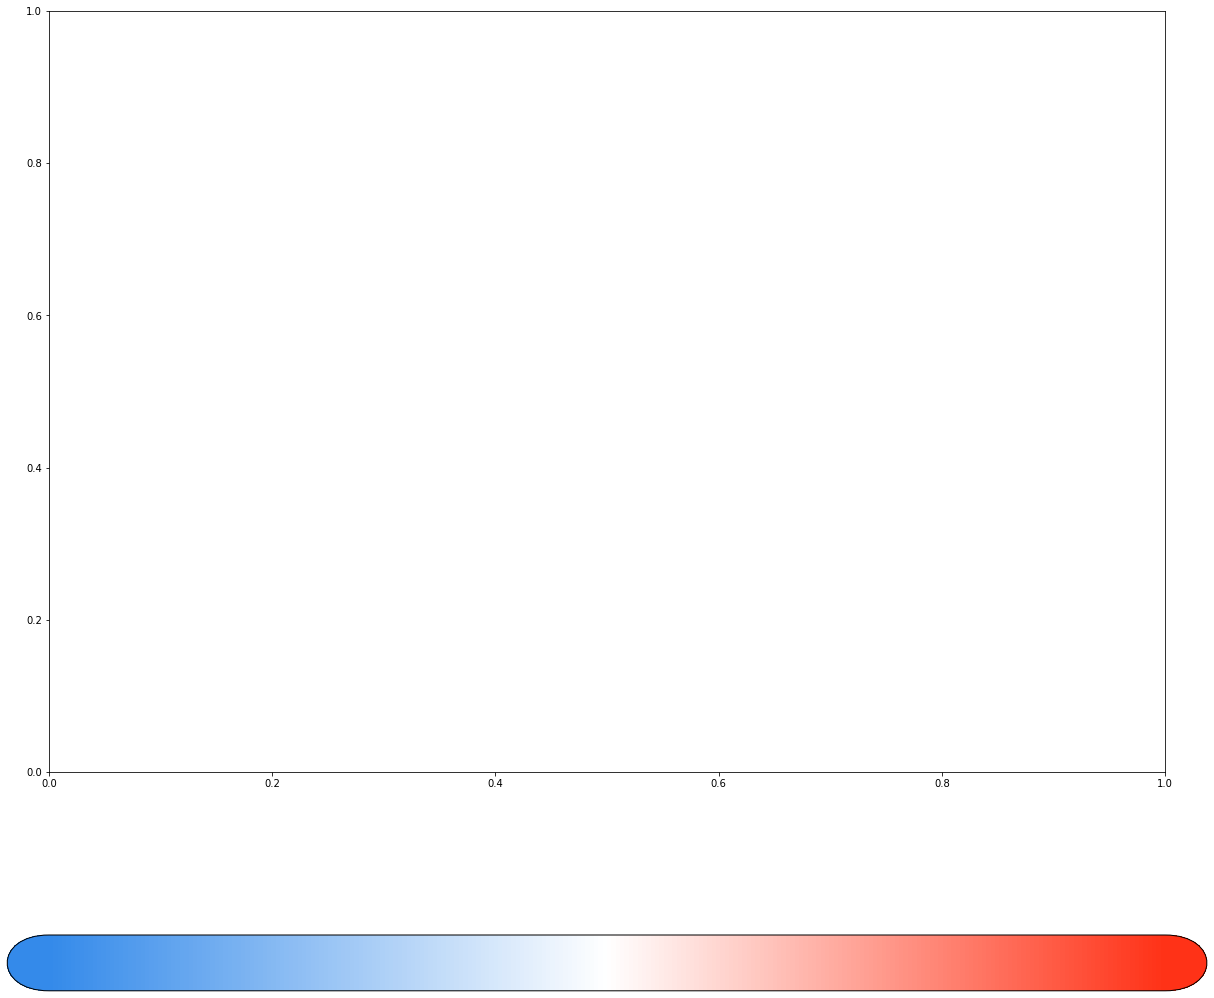

In [92]:
fig3, ax = plt.subplots(1, figsize=(20, 20))
orientation = "horizontal"
sm = plt.cm.ScalarMappable(cmap=c, norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm.set_array([])
cb = fig3.colorbar(sm, orientation=orientation)
cb.set_ticks([])

Path = mpath.Path
cb.outline.set_visible(False)
bot = -0.05
top = 1.05

xy = np.array([[0, 1], [0, top], [1, top], [1, 1]])
if orientation == "horizontal":
    xy = xy[:, ::-1]

curve = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4,]

color = cb.cmap(cb.norm(cb._values[-1]))
patch = patches.PathPatch(
    mpath.Path(xy, curve),
    facecolor=color,
    linewidth=0,
    antialiased=False,
    transform=cb.ax.transAxes,
    clip_on=False,
)
cb.ax.add_patch(patch)

xy = np.array([[0, 0], [0, bot], [1, bot], [1, 0]])
if orientation == "horizontal":
    xy = xy[:, ::-1]

color = cb.cmap(cb.norm(cb._values[0]))
patch = patches.PathPatch(
    mpath.Path(xy, curve),
    facecolor=color,
    linewidth=0,
    antialiased=False,
    transform=cb.ax.transAxes,
    clip_on=False,
)
cb.ax.add_patch(patch)

xy = np.array(
    [[0, 0], [0, bot], [1, bot], [1, 0], [1, 1], [1, top], [0, top], [0, 1], [0, 0]]
)
if orientation == "horizontal":
    xy = xy[:, ::-1]

curve = [
    Path.MOVETO,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
    Path.LINETO,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
    Path.LINETO,
]
path = mpath.Path(xy, curve, closed=True)

patch = patches.PathPatch(
    path, facecolor="None", lw=1, transform=cb.ax.transAxes, clip_on=False
)
cb.ax.add_patch(patch)
fig3.savefig('India2.png', dpi=300)

In [93]:
'''fig, ax = plt.subplots(1, figsize=(5, 5))
p1 = Patch(facecolor=c.mpl_colors[4], edgecolor='black')
p2 = Patch(facecolor=c.mpl_colors[3], edgecolor='black')
p3 = Patch(facecolor=c.mpl_colors[2], edgecolor='black')
p4 = Patch(facecolor=c.mpl_colors[1], edgecolor='black')
p5 = Patch(facecolor=c.mpl_colors[0], edgecolor='black')

ax.legend(handles=[p1, p2, p3, p4, p5],
          labels=['Rank 1-5', 'Rank 6-10', 'Rank 11-15', 'Rank 16-20', 'Rank 21-29'],
          ncol=1, handletextpad=0.8, handlelength=2.0, columnspacing=0.5,
          loc='center', fontsize=16, prop=prop)
ax.axis('off')
plt.show()
fig.savefig('India5.png', dpi=300)'''

"fig, ax = plt.subplots(1, figsize=(5, 5))\np1 = Patch(facecolor=c.mpl_colors[4], edgecolor='black')\np2 = Patch(facecolor=c.mpl_colors[3], edgecolor='black')\np3 = Patch(facecolor=c.mpl_colors[2], edgecolor='black')\np4 = Patch(facecolor=c.mpl_colors[1], edgecolor='black')\np5 = Patch(facecolor=c.mpl_colors[0], edgecolor='black')\n\nax.legend(handles=[p1, p2, p3, p4, p5],\n          labels=['Rank 1-5', 'Rank 6-10', 'Rank 11-15', 'Rank 16-20', 'Rank 21-29'],\n          ncol=1, handletextpad=0.8, handlelength=2.0, columnspacing=0.5,\n          loc='center', fontsize=16, prop=prop)\nax.axis('off')\nplt.show()\nfig.savefig('India5.png', dpi=300)"

C:\Users\siddh\AppData\Local\Temp/ipykernel_11732/2285360577.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(merged2.index, fontsize=20, fontproperties=prop)


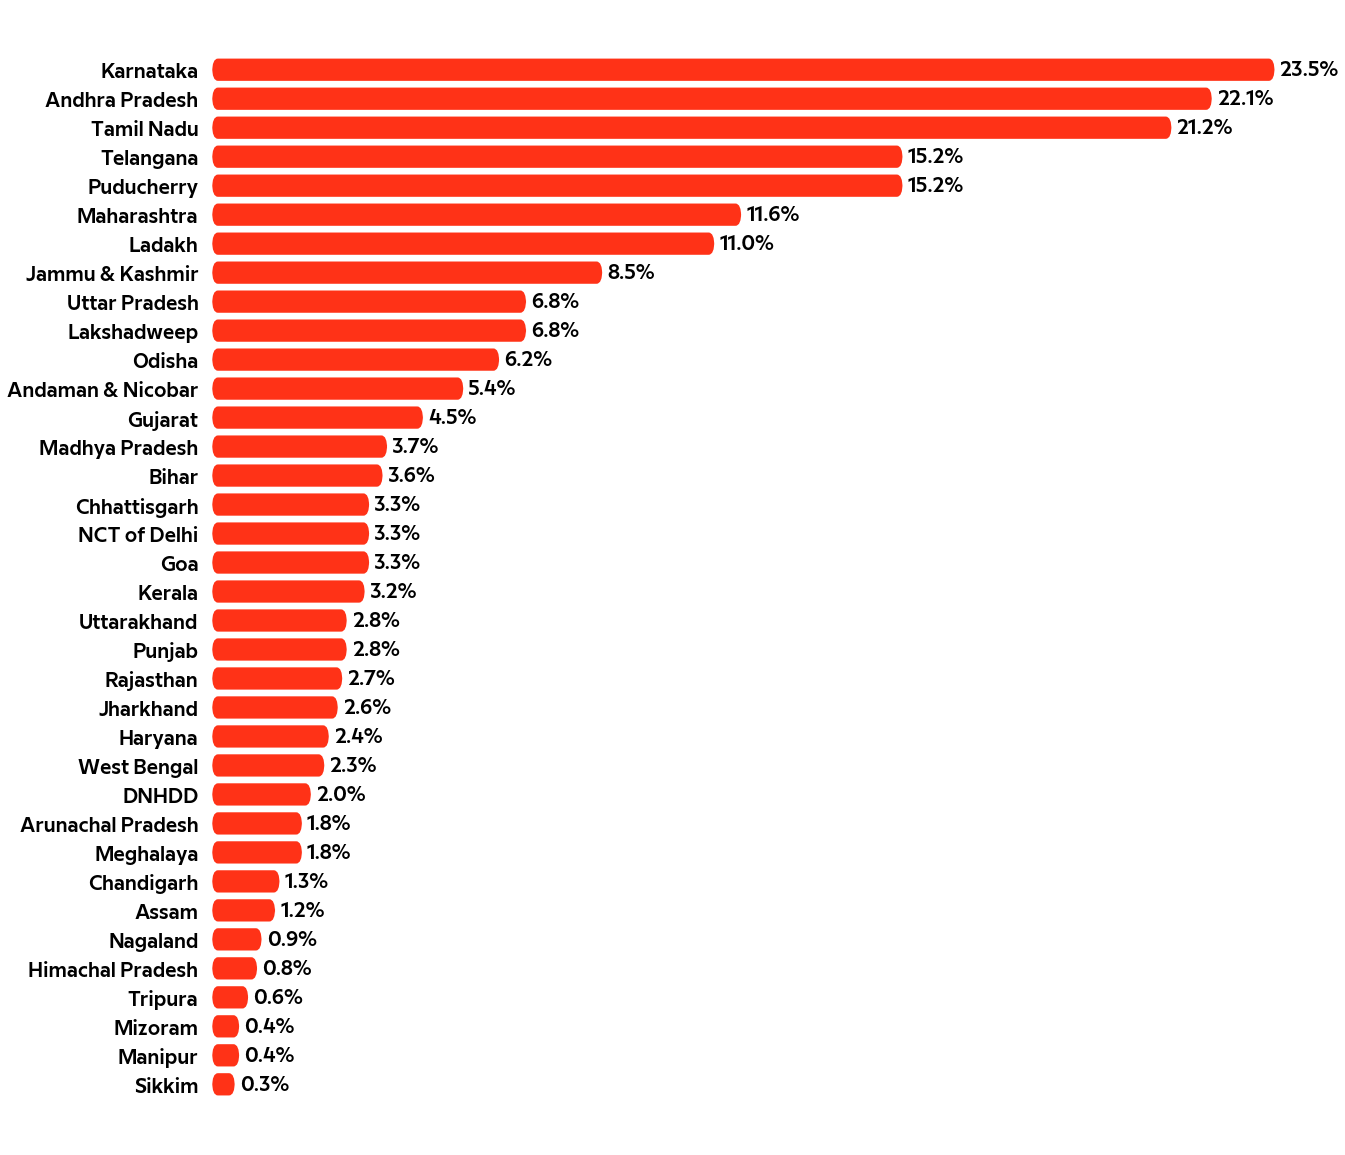

In [94]:
merged_new = merged.dropna().rename(index={'Dadra and Nagar Haveli and Daman and Diu': 'DNHDD', 
                                 'Andaman and Nicobar Islands': 'Andaman & Nicobar',
                                 'Jammu and Kashmir': 'Jammu & Kashmir'})
merged_new["value2"] = merged_new["value"]/merged["value"].max()*22+0.2
merged2 = merged_new
merged2.sort_values(by=["value2"], inplace=True, ascending=False)
fig2, ax = plt.subplots(figsize =(20, 21))
ax.barh(merged2.index , merged2["value2"], color = [b[0]/255, b[1]/255, b[2]/255], align= 'center')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
#ax.grid(b = True, color ='blue', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
ax.xaxis.set_visible(False)
ax.set_yticklabels(merged2.index, fontsize=20, fontproperties=prop)
ax.invert_yaxis()
#ax.set(xlim=[350, 850])

new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=-0.0040,rounding_size=0.12",
                        ec="none", fc=color,
                        mutation_aspect=4)
    patch.remove()
    new_patches.append(p_bbox)
for patch in new_patches:
    ax.add_patch(patch)

for i in ax.patches:
    plt.text(i.get_width()+.1, i.get_y()+0.6, ''+ str(float(round((i.get_width()-0.2)*merged["value"].max()/22, 1))) + '%', 
             fontsize = 20, color = 'black', fontweight ='bold', fontproperties= prop)
    
plt.show()
fig2.savefig('India3.png', dpi=300, transparent=True, bbox_inches='tight')

In [95]:
img1 = Image.open(r"BG.jpg")
img2 = Image.open(r"BG.jpg")
ind = Image.open(r"India.png")
ind2 = Image.open(r"India2.png")
ind5 = Image.open(r"India5.png")
ind = ind.resize((1350, 1350), Image.ANTIALIAS)
ind2 = ind2.resize((550, 550), Image.ANTIALIAS)
ind2 = ind2.crop((50,400,520,450))
ind2 = ind2.resize((300, 32))
ind2 = ind2.rotate(90, expand = 1)
ind5 = ind5.resize((650, 650), Image.ANTIALIAS)
img1.paste(ind, (-132,-105), mask = ind)
#img1.paste(ind2, (750,1035), mask = ind2)
img1.paste(ind2, (15,650), mask = ind2)
#img1.paste(ind5, (-240,680), mask = ind5)

I1 = ImageDraw.Draw(img1)
myFont1 = ImageFont.truetype('LeagueSpartan.otf', 36) #42
myFont2 = ImageFont.truetype('LeagueSpartan.otf', 22)
myFont2a = ImageFont.truetype('LeagueSpartan.otf', 18)
myFont3 = ImageFont.truetype('LeagueSpartan.otf', 80)
myFont4 = ImageFont.truetype('LeagueSpartan.otf', 20)
myFont5 = ImageFont.truetype('LeagueSpartan.otf',55) #55
myFont6 = ImageFont.truetype('LeagueSpartan.otf', 16)
myFont7 = ImageFont.truetype('Arthura-MediumItalic.otf', 14)
myFont8 = ImageFont.truetype('Arthura-Italic.otf', 14)

def func():
    I1.text((740, 85), "COUSIN MARRIAGE", 
            font=myFont1, fill =(46, 26, 89), align="center", anchor="mb")
    #I1.text((740, 130), "2021 MEDAL TALLY", 
    #        font=myFont1, fill =(46, 26, 89), align="center", anchor="mb")
    I1.text((740, 95), "IN INDIA", 
    #I1.text((740, 145), "IN INDIA", 
            font=myFont5, fill =(46, 26, 89), align="center", anchor="mt")
    I1.text((740, 150), "(% EVER-MARRIED WOMEN AGED 15-49", 
            font=myFont2a, fill =(46, 26, 89), align="center", anchor="mt")
    I1.text((740, 180), "WHOSE HUSBAND IS THEIR FIRST COUSIN)", 
            font=myFont2a, fill =(46, 26, 89), align="center", anchor="mt")
    #I1.text((740, 210), "(PER 1 LAKH POPULATION)", 
    #        font=myFont2a, fill =(46, 26, 89), align="center", anchor="mt")
    #I1.text((740, 220), "MAY-2022", 
    #        font=myFont1, fill =(46, 26, 89), align="center", anchor="mb")
    I1.text((1066, 1066), "Created by The Maps Daily", 
        font=myFont7, fill =(0, 0, 0), align="center", anchor="rs")

func()

I1.text((50, 950), '0%', #str(int(vmin))+'% ', 
        font=myFont6, fill =(0, 0, 0), align="center", anchor="ls")
I1.text((50, 668), str(int(vmax))+'% ', #str(float(vmax))
        font=myFont6, fill =(0, 0, 0), align="center", anchor="ls")
I1.text((50, 809), '8% ', #str(float(vmax))
        font=myFont6, fill =(0, 0, 0), align="center", anchor="ls")

I1.text((850, 670), "OVERALL INDIA", 
        font=myFont2, fill =(0, 0, 0), align="center", anchor="mb")
I1.text((850, 755), "8.0%", 
        font=myFont3, fill =(46, 26, 89), align="center", anchor="mb")
'''I1.text((850, 640), "PARLIAMENT", 
        font=myFont2, fill =(0, 0, 0), align="center", anchor="mb")
I1.text((850, 685), "72.19%", 
        font=myFont1, fill =(46, 26, 89), align="center", anchor="mb")
I1.text((850, 740), "OVERALL INDIA", 
        font=myFont2, fill =(0, 0, 0), align="center", anchor="mb")
I1.text((850, 805), "2", 
        font=myFont5, fill =(46, 26, 89), align="center", anchor="mb")'''
#I1.text((850, 770), "SQ.KM.", 
#        font=myFont2, fill =(46, 26, 89), align="center", anchor="mt")

I1.text((15, 1015), "Scale: Percentage", #1015
        font=myFont7, fill =(0, 0, 0), align="center", anchor="ls")
I1.text((15, 1032), "Source: National Family Health Survey-5 (NFHS-5) 2019-21", #1032
        font=myFont7, fill =(0, 0, 0), align="center", anchor="ls")
I1.text((15, 1049), "Ministry of Health and Family Welfare, Govt. of India.", 
        font=myFont7, fill =(0, 0, 0), align="center", anchor="ls")
I1.text((15, 1066), "Areas in grey, if any indicate that data was not available for the State/UT.", 
#I1.text((15, 1066), "Areas in grey, if any indicate that there are no thermal power plants in the State/UT.", 
#I1.text((15, 1066), "Source: Glosbe Dictionaries and varied sources.", 
        font=myFont8, fill =(0, 0, 0), align="center", anchor="ls")

img1.save("zimg_1.png")

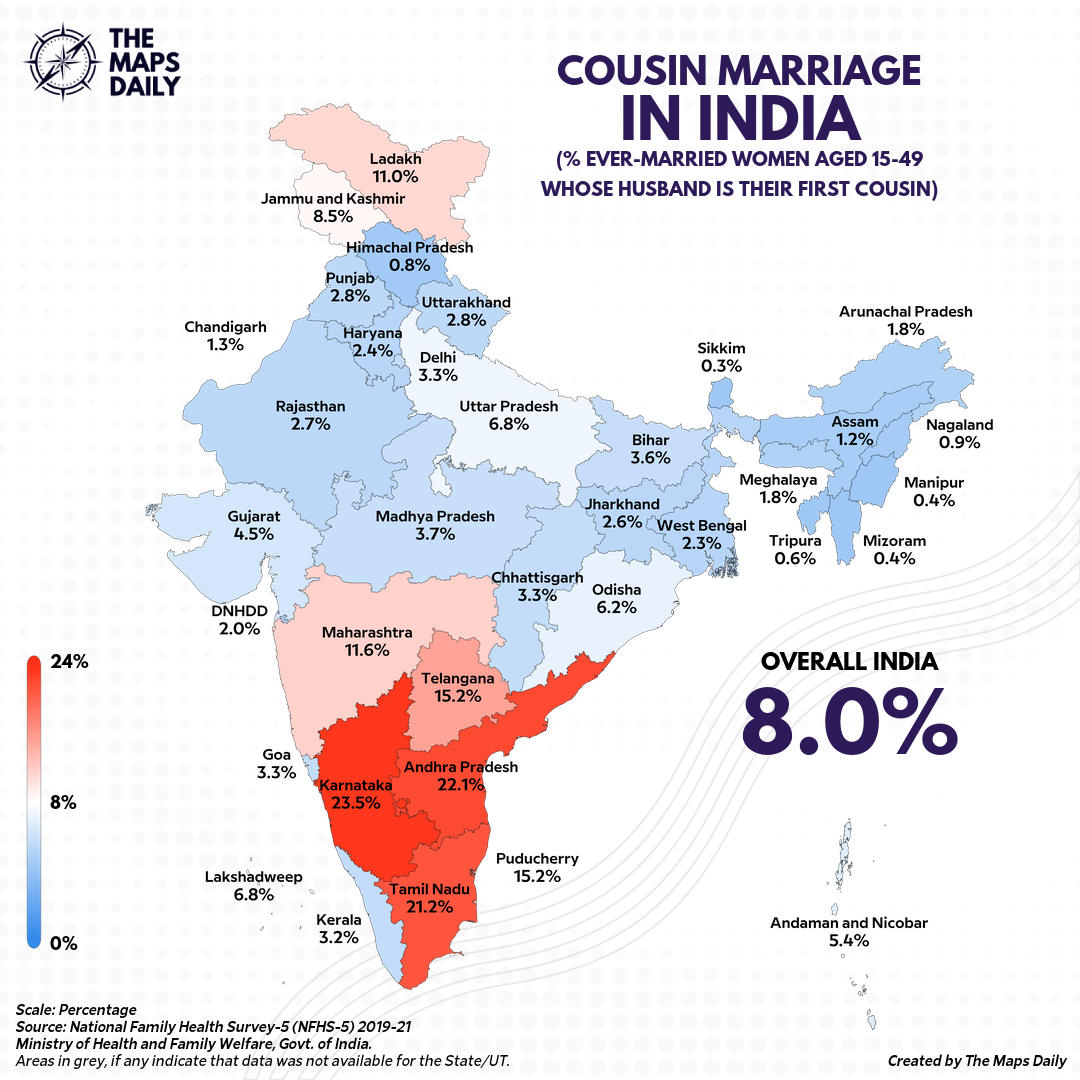

In [96]:
img_1 = Image.open(r"zimg_1.png")
img_1

In [97]:
ind3 = Image.open(r"India3.png")
ind3.size

(5608, 4816)

In [98]:
ind3 = Image.open(r"India3.png")
new_width  = 1040
new_height = new_width * ind3.size[1] / ind3.size[0]
ind3 = ind3.resize((int(new_width), int(new_height)), Image.ANTIALIAS)
img2.paste(ind3, (20,195), mask = ind3)

I1 = ImageDraw.Draw(img2)
func()
img2.save("zimg_2.png")

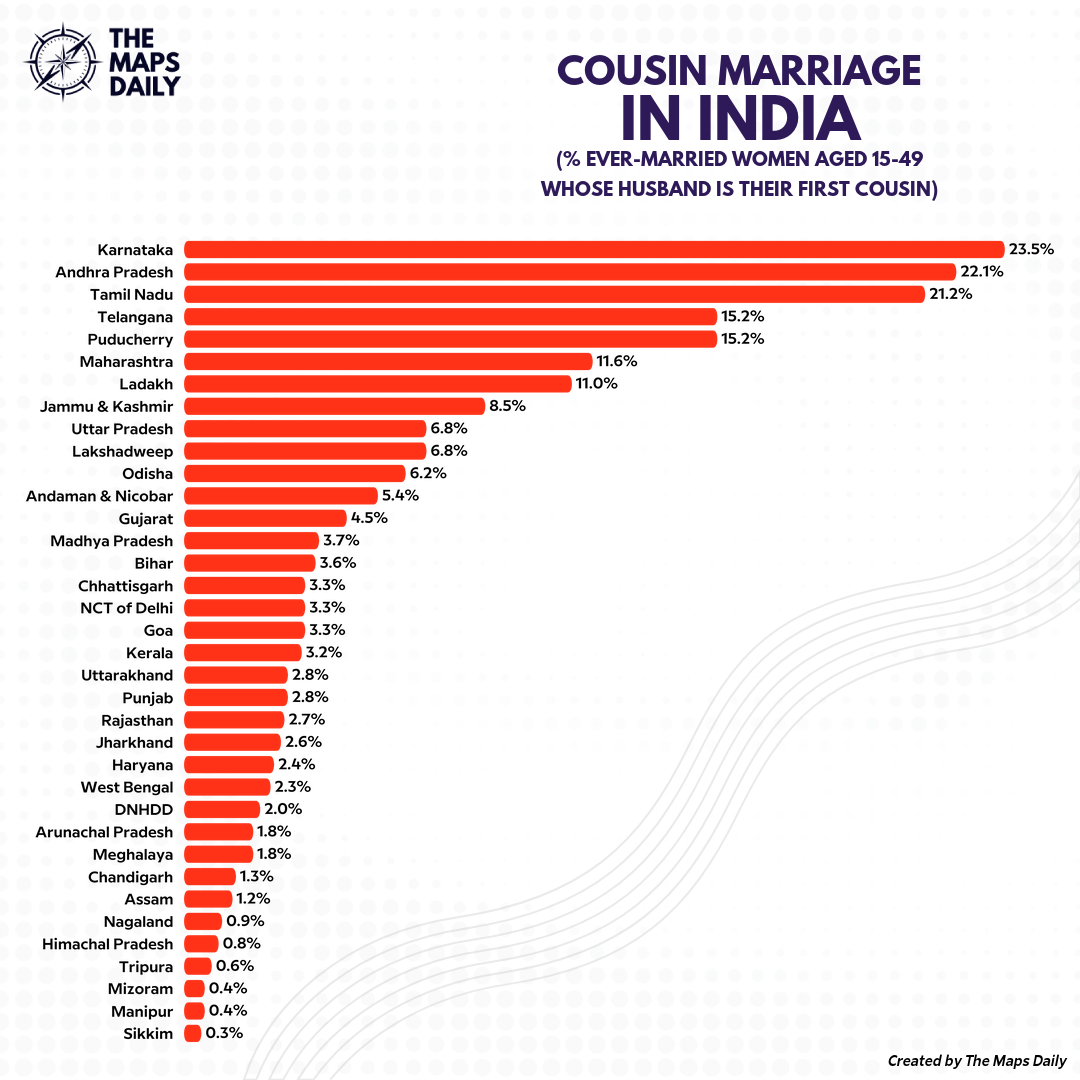

In [99]:
img_2 = Image.open(r"zimg_2.png")
img_2